Yesterday, we built an ARIMA model using order=(1, 1, 1). Why (1, 1, 1)? Because we guessed. In Data Science, guessing is dangerous.

What if (2, 1, 2) was better?

What if (0, 1, 1) was simpler?

Today, we stop guessing. We use AutoARIMA. It is the "Grid Search" of Time Series. It automatically tries every combination of p, d, and q and gives you the mathematically perfect model.

# ***`Use the pmdarima library to automatically discover the optimal ARIMA parameters (p, d, q) by minimizing the AIC score`***

Imagine you want a suit.

**Manual (Yesterday):** You grab a random size (Size 40) off the rack and hope it fits. It's okay, but the sleeves are too long.

**AutoARIMA (Today):** A tailor measures you. They try on Size 38, Size 40, Size 42. They adjust the sleeves. They find the exact fit.

How does the Tailor know what is "Best"? They use a score called AIC (Akaike Information Criterion).

Accuracy: How well does it fit?

Simplicity: Is it too complicated? (We want the simplest model that works).

## Goal: Lowest AIC Score wins.

In [5]:
%pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima

In [9]:
#create a complex data(Trend + Seasonality  +Noise) 

dates = pd.date_range(start= '2024-01-01' , periods = 150 , freq ='D')
np.random.seed(42)

#tend 0.5 + seasonality sinwave + noise
data = np.linspace(0,50,150) + 10*np.sin(np.linspace(0,3.14*5 , 150))+  np.random.normal(0,2,150)


df = pd.DataFrame({'Date': dates , 'Prices': data})
df.set_index('Date' , inplace = True)



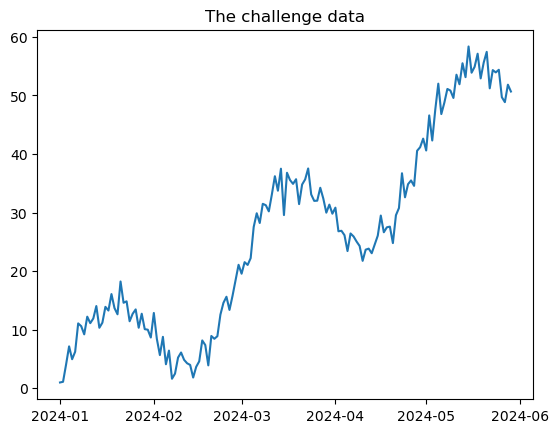

In [10]:
#test and train split

train = df.iloc[:120]
test = df.iloc[120:]

plt.plot(df['Prices'])
plt.title('The challenge data')
plt.show()

# Run Auto ARIMA

trace=True lets us watch it trying different combinations in real-time.

In [14]:
# auto tune


print('Finding the best model...')

# start_p, start_q: Where to start looking
# max_p, max_q: The maximum complexity allowed
# m=1: Frequency (1 for non-seasonal, though our data has seasonality, we'll keep it simple for now)


model = auto_arima(train['Prices'], start_p =1 , start_q = 1 , max_p = 5, max_q = 5 , d = None , trace = True , error_action = 'ignore' ,
                   suppress_warnings= True, stepwise = True)

print('\n Best Model found: ')
print(model.summary())

Finding the best model...
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=565.416, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=579.123, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=563.884, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=564.839, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=578.953, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=565.207, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=562.303, Time=0.08 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=562.505, Time=0.12 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=562.322, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=567.114, Time=0.07 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=566.516, Time=0.05 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=561.868, Time=0.14 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=563.216, Time=0.19 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=549.303, Time=0.27 sec
 ARIMA(2,1,3)(0,0,0)[

# 4: Forecast with the Winner

the model object is now the best model

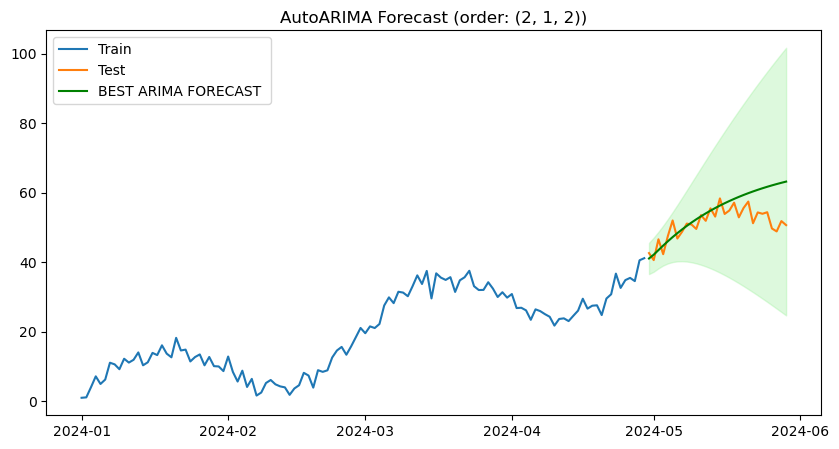

In [16]:
#preditc

prediction , conf_int = model.predict(n_periods = 30 , return_conf_int= True)

#visualize

plt.figure(figsize=(10,5))
plt.plot(train.index , train['Prices'] , label = 'Train')
plt.plot(test.index , test['Prices'] , label = 'Test')

plt.plot(test.index , prediction , label = 'BEST ARIMA FORECAST ' , color = 'green')

#confidence interval (that pinkinsh shaded part from yesterday)

plt.fill_between(test.index , conf_int[:,0], conf_int[:,1] , color = 'lightgreen' , alpha = 0.3)

plt.title(f"AutoARIMA Forecast (order: {model.order})")
plt.legend()
plt.show()

### Model Selection Using AIC (Stepwise Search)

The stepwise search tested many ARIMA models and compared them using **AIC (Akaike Information Criterion)**.

Some of the tested models and their AIC values were:

- ARIMA(1,1,1) → AIC = 565.416  
- ARIMA(2,1,1) → AIC = 562.303  
- ARIMA(3,1,2) → AIC = 561.868  
- ARIMA(3,1,3) → AIC = 549.303  
- ARIMA(2,1,3) → AIC = 548.233  
- ARIMA(1,1,3) → AIC = 547.970  
- **ARIMA(2,1,2) → AIC = 547.044 (Best)**

Since **lower AIC values indicate a better balance between model accuracy and simplicity**, the model with the **lowest AIC** was selected.

---

### Final Selected Model

 **Best Model:** ARIMA(2,1,2)  
- AIC = **547.044**
- Observations = 120
- Log Likelihood = -268.522

This model provides the **best trade-off between goodness of fit and model complexity** among all the tested models.

---

### Why AIC?

AIC helps prevent overfitting by penalizing overly complex models.

- A very complex model with only a small improvement in accuracy gets a **higher AIC**
- A simpler model with strong performance gets a **lower AIC**

 Therefore, **ARIMA(2,1,2)** was automatically chosen as the most effective and efficient model.
